# Very Simple Product Demo

In [1]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 20,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = ["Aerospace Engineering","Chemical Engineering", "Physics" "Civil and Environmental Engineering", "Industrial Engineering", "Materials Science and Engineering", "Plasma engineering", "Mechanical Engineering",
              "Aerospace Engineer", 
        "Flight Systems Test Engineer", 
        "Spacecraft Designer", 
        "Aerodynamics Analyst", 
        "Propulsion Engineer",
        "Process Engineer", 
        "Chemical Plant Manager", 
        "Biochemical Engineer", 
        "Environmental Engineer", 
        "Quality Control Engineer",
              "Research Scientist", 
        "Laboratory Technician", 
        "High School Physics Teacher", 
        "Data Analyst", 
        "Radiologist",
                 "Civil Engineer", 
        "Structural Engineer", 
        "Environmental Consultant", 
        "Water Resources Engineer", 
        "Urban Planner"
              ],
      color = ["blue","red"]
    ),
    link = dict(
      source = [6, 2, 3, 2, 2, 5, 6, 0, 6, 0, 1, 6, 2, 3, 3, 7, 1, 3, 0, 2, 6, 2, 3, 3, 3, 7, 5, 1, 4, 4, 4, 5, 6, 4, 0, 3, 5, 2, 2, 0, 1, 4, 6, 3, 0, 5, 4, 3, 6, 0],
      target = [19, 13, 17, 17, 12, 24, 15, 19, 13, 12, 16, 8, 15, 21, 27, 18, 16, 20, 25, 18, 16, 15, 18, 9, 21, 10, 7, 23, 19, 13, 27, 27, 20, 24, 9, 11, 24, 16, 15, 10, 14, 24, 13, 14, 15, 18, 15, 19, 22, 17],
      value = [25, 11, 19, 24, 22, 21, 14, 23, 26, 22, 47, 21, 25, 47, 9, 6, 34, 38, 35, 45, 18, 39, 0, 24, 21, 22, 32, 32, 47, 36, 21, 29, 40, 35, 24, 19, 18, 47, 9, 0, 30, 32, 14, 0, 17, 37, 23, 29, 39, 29]

  ))])

# fig.update_layout(title_text="From Academia to Industry", font_size=10)
# fig.show()

![newplot.png](newplot.png)

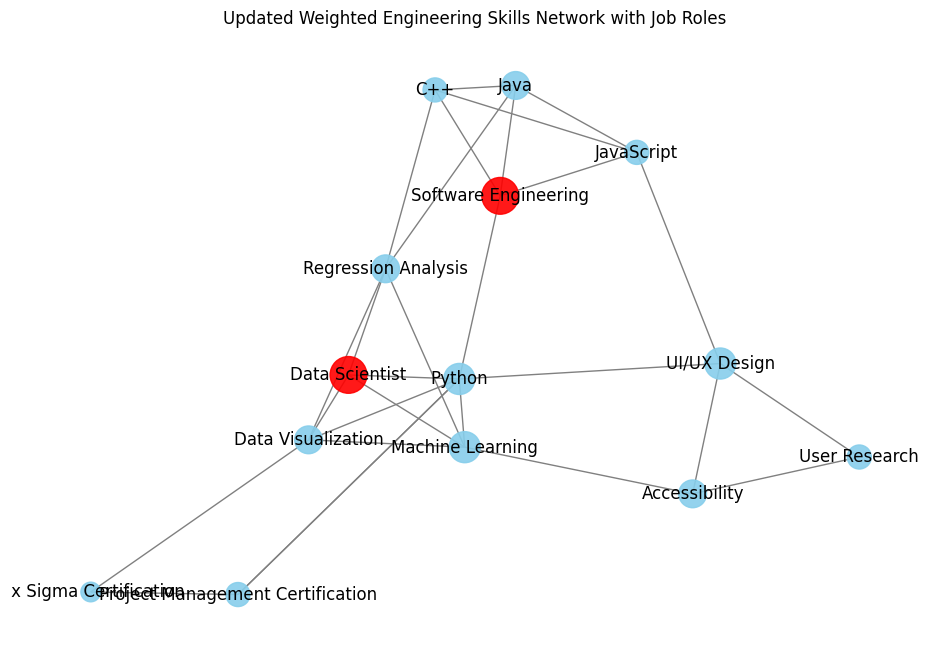

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the skills and their weights
skills_weights = {
    "Python": 5, "Java": 4, "C++": 3, "JavaScript": 3,  # Software skills
    "Regression Analysis": 4, "Machine Learning": 5, "Data Visualization": 4,  # Statistical Modeling skills
    "User Research": 3, "UI/UX Design": 5, "Accessibility": 4,  # Experience Design skills
    "Project Management Certification": 3, "Six Sigma Certification": 2  # Certifications
}

# Additional job nodes with their weights
job_weights = {
    "Software Engineering": 7,
    "Data Scientist": 7
}

# Merge the two dictionaries for node creation
all_nodes_weights = {**skills_weights, **job_weights}

# Edges from skills to job roles with weights
job_edges = [
  ("Python", "Software Engineering", 5), ("Java", "Software Engineering", 4),
    ("C++", "Software Engineering", 3), ("JavaScript", "Software Engineering", 3),
    ("Python", "Data Scientist", 5), ("Machine Learning", "Data Scientist", 5),
    ("Data Visualization", "Data Scientist", 4), ("Regression Analysis", "Data Scientist", 4)
]
# Skill-to-skill edges with weights
skill_edges = [
    ("Python", "Machine Learning", 5), ("Python", "Data Visualization", 4),
    ("Java", "C++", 4), ("Java", "JavaScript", 3), ("C++", "JavaScript", 3),
    ("Regression Analysis", "Machine Learning", 4), ("Regression Analysis", "Data Visualization", 4),
    ("Machine Learning", "Data Visualization", 5),
    ("User Research", "UI/UX Design", 5), ("UI/UX Design", "Accessibility", 4),
    ("User Research", "Accessibility", 3),
    ("Project Management Certification", "Six Sigma Certification", 3),
    ("Project Management Certification", "Python", 2),
    ("Six Sigma Certification", "Data Visualization", 2),
    ("Python", "UI/UX Design", 3), ("JavaScript", "UI/UX Design", 3),
    ("C++", "Regression Analysis", 3), ("Machine Learning", "Accessibility", 4),
    ("Java", "Regression Analysis", 3), ("Python", "Project Management Certification", 2)
]

# Combine skill-to-skill edges with job edges
all_edges = skill_edges + job_edges

# Create the graph with updated edges
G_weighted_updated = nx.Graph()

# Add nodes with weights
for node, weight in all_nodes_weights.items():
    G_weighted_updated.add_node(node, size=weight*100, color='red' if node in job_weights else 'skyblue')

# Add updated edges with weights to the graph
for src, dst, weight in all_edges:
    G_weighted_updated.add_edge(src, dst, weight=weight)

# Draw the updated weighted graph
plt.figure(figsize=(12, 8))
pos_weighted_updated = nx.spring_layout(G_weighted_updated)  # positions for all nodes

# Node sizes and colors
sizes = [G_weighted_updated.nodes[node]['size'] for node in G_weighted_updated]
colors = [G_weighted_updated.nodes[node]['color'] for node in G_weighted_updated]

# Draw nodes, labels, and edges for the updated weighted graph
nx.draw_networkx_nodes(G_weighted_updated, pos_weighted_updated, node_size=sizes, node_color=colors, alpha=0.9)
nx.draw_networkx_labels(G_weighted_updated, pos_weighted_updated, font_size=12)
nx.draw_networkx_edges(G_weighted_updated, pos_weighted_updated, edgelist=all_edges, edge_color='gray')

plt.title("Updated Weighted Engineering Skills Network with Job Roles")
plt.axis('off')  # Turn off the axis
plt.show()
